In [21]:
#num 7
import numpy as np
import matplotlib.pyplot as pl

In [12]:
fn = lambda x: x / (3 + x**2)

In [13]:
fn(5)

0

In [14]:
def fun(x):
    return x / (3 + x**2)

In [6]:
fun(2)

0

In [7]:
fun(np.arange(0.2, 0.7, 0.1))

array([ 0.06578947,  0.09708738,  0.12658228,  0.15384615,  0.17857143])

In [8]:
np.arange(0.2, 0.6, 0.1)

array([ 0.2,  0.3,  0.4,  0.5])

In [9]:
x = np.linspace(-5,5,28)
pl.plot(x, fun(x), x, Nutint(), 'r')
pl.grid(1)

NameError: name 'Nutint' is not defined

In [10]:
def interp(func, n=30, dis=0):
    x = np.linspace(-5, 5, n) 
    y = [func(x + dis) for x in x]
    dy = [(y[1:][j] - y[j])*n for j in range(n-1)]
    ddy = [(y[2:][j] - 2*y[1:][j] + y[j])*(n**2)/2 for j in range(n-2)]
    return [x, y, dy, ddy]
res = interp(fun)

In [11]:
def Nutint(x = np.linspace(-5, 5, 30) , lst=np.linspace(-5, 5, len(res[-1])), res=res): 
    return [y[i] + (lst[i] - x[i])*dy[i] + (lst[i] - x[i])*(lst[i] - x[1:][i])**2*ddy[i] for i in range(len(res[-1]))]
Nutint()

NameError: global name 'y' is not defined

In [0]:
n=30
x = np.linspace(0, 1, n) 
y = [fun(i) for i in x]
dy = [(y[1:][j] - y[j])*n for j in range(n-1)]
ddy = [(y[2:][j] - 2*y[1:][j] + y[j])*(n**2)/2 for j in range(n-2)]

In [0]:
len(ddy)

In [12]:
len(np.linspace(0, 1, len(res[-1])))

28

In [13]:
#лагранж

In [14]:
fn = lambda x: x / (3 + x**2)
x = np.linspace(-5, 5, 15);x
fzn = fn(x);h = 0.71428571428571441

In [15]:
print(x[2] - x[1], x[1] - x[0])

(0.71428571428571441, 0.71428571428571441)


In [16]:
[x[1:][i] - x[i] for i in range(len(x)-1)]

[0.71428571428571441,
 0.71428571428571441,
 0.71428571428571397,
 0.71428571428571441,
 0.71428571428571441,
 0.71428571428571397,
 0.71428571428571441,
 0.71428571428571441,
 0.71428571428571441,
 0.71428571428571441,
 0.71428571428571441,
 0.71428571428571352,
 0.7142857142857153,
 0.71428571428571352]

#5

In [20]:
def Lagr(func, arr, x):
    h = abs(arr[1] - arr[0])
    farr = [func(u) for u in arr]
    Q = []
    for  i in range(len(x)-1):
        ind = 1
        znc = 0
        for  k in range(len(farr)):
            for j in range(len(arr)):
                if i == j: continue
                ind *= (x[i] - arr[j])/h
            znc += farr[k]*ind
        Q += [znc]
    return (np.array(Q + [Q[-1]]) ) 

In [93]:
n = 5
arr = np.linspace(-5,5, n)
x = np.linspace(-5, 5, 20)
print(fun(x))
(Lagr(fun, arr, x))

[-0.17857143 -0.19439095 -0.21243292 -0.23266767 -0.25438169 -0.27509653
 -0.28812825 -0.27810304 -0.21788991 -0.08574007  0.08574007  0.21788991
  0.27810304  0.28812825  0.27509653  0.25438169  0.23266767  0.21243292
  0.19439095  0.17857143]


array([  4.86176733e+19,  -6.10976013e+15,  -3.51541183e+14,
        -8.64111238e+12,  -2.44876509e+10,  -3.65485503e+13,
        -3.15654130e+16,  -8.42013680e+16,  -2.47316619e+16,
        -1.81953563e+14,   1.82502941e+14,   2.47595987e+16,
         8.42758047e+16,   3.15993704e+16,   3.67007440e+13,
        -1.87520234e+16,  -1.56110019e+18,  -8.35180342e+18,
        -4.53334097e+18,  -4.53334097e+18])

In [94]:
len(x)

20

In [95]:
print(len(x))
n = 5
arr = np.linspace(-5,5, n)
x = np.linspace(-5, 5, 20).tolist()
len(Lagr(fun, arr, x))

20


20

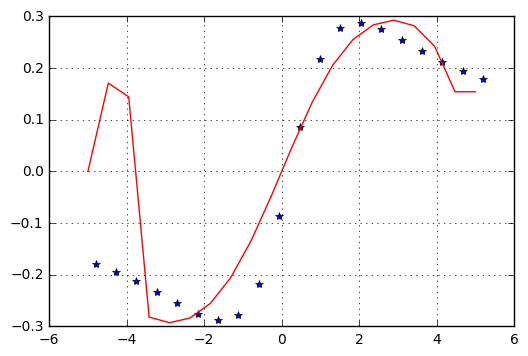

In [36]:
n = 3
arr = np.linspace(-5, 5, n)
x = np.linspace(-5, 5, 20)
LA = Lagr(fun, arr, x).tolist()
pl.plot(x+0.2, fun(x),'*', x, np.array([0] + LA[1:])*5, 'r')
pl.grid(1)

In [91]:
x[0]-x[1]

-0.5263157894736841

In [42]:
import numpy as np
import matplotlib.pyplot as plt
n = 4
x = np.linspace(-5, 5, n)
y = fun(x)
def lagranz(x,y,t):
    z = 0
    for j in range(len(y)):
        p1 = 1
        p2 = 1
        for i in range(len(x)):
            if i==j:
                p1 = p1*1
                p2 = p2*1   
            else: 
                p1 *= (t-x[i])
                p2 *= (x[j]-x[i])
        z += y[j]*p1/p2
    return z

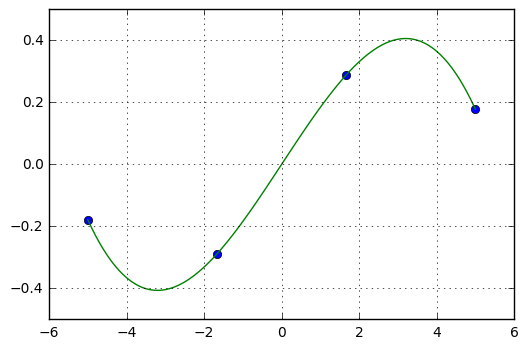

In [43]:
xnew=np.linspace(np.min(x),np.max(x),100)
ynew=[lagranz(x,y,i) for i in xnew]
plt.plot(x,y,'o',xnew,ynew)
plt.grid(True)
plt.show()

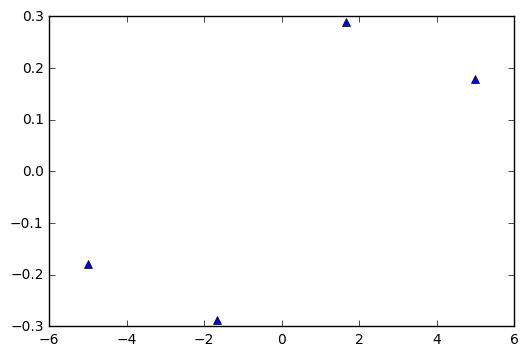

In [40]:
plt.plot(x,y,'^')

In [0]:
#######################

In [9]:
n = 25
x = np.linspace(-5,5,n)
y = fn(x)

def product( val, n ):
    mul = 1
    for i in range(n):
        if i: mul *= val - x[i-1]
        yield mul
C=[] 
for n in range(len(x)):
    p = product( x[n], n+1 )
    C.append( (y[n]-sum(C[k]*next(p) for k in range(n)) )/next(p) )

def f( v ):
    return sum(C[k]*p for k, p in enumerate(product(v, len(C)) ))

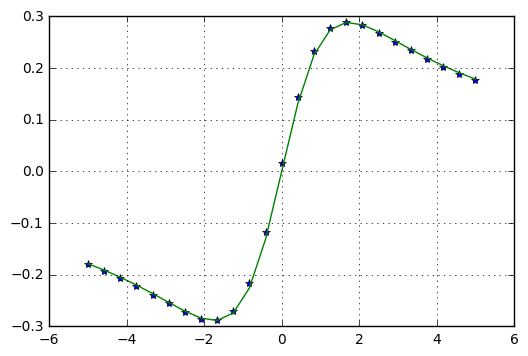

In [10]:
pl.plot(x, fun(x+0.05), '*', x, f(x))
pl.grid(1)